In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/football-players-stats-premier-league-20212022/Football Players Stats (Premier League 2021-2022).csv


# Analise de dados Premier league 21/22

**Este conjunto de dados contém estatísticas de jogadores de futebol da Premier League (2021-2022).**
**Vamos avaliar as metricas disponíves e listar as conclusões possíveis a partir destes dados.**

São perguntas importantes:

Quais jogadores jovens e maduros tem os melhores desempenhos com as métricas disponíveis?

É possível separa-los por função principal em campo?

É possível listar os jogadores com desempenhos semelhantes em funções semelhantes?

Quais jogadores tem mais experiencia comprovada no campeonato?

A descrição das colunas está listada abaixo.
Estes são os recursos disponíveis para avaliarmos os jogadores em suas diferentes funções.

* Player: Nome do jogador
* Team: Clube em que jogou em 2021-2022
* Nation: Nacionalidade do jogador
* Pos: Posição
* Age: Idade do jogador
* MP: Partidas jogadas
* Starts: Partidas como titular
* Min: Minutos jogados
* 90s: Minutos jogados dividido por 90
* Gls: Gols marcados ou sofridos
* Ast: Assistências
* G-PK: Gols não de pênalti
* PK: Pênaltis convertidos
* PKatt: Pênaltis tentados
* CrdY: Cartões amarelos
* CrdR: Cartões vermelhos
* Gls: Gols marcados por 90 minutos
* Ast: Assistências por 90 minutos
* G+A: Gols e assistências por 90 minutos
* G-PK: Gols menos pênaltis convertidos por 90 minutos
* G+A-PK: Gols mais assistências menos pênaltis convertidos por 90 minutos
* xG: Gols esperados
* npxG: Gols esperados não de pênalti
* xA: Assistências esperadas
* npxG+xA: Gols esperados não de pênalti mais assistências esperadas
* xG: Gols esperados por 90 minutos
* npxG: Gols esperados não de pênalti por 90 minutos
* xA: Assistências esperadas por 90 minutos
* npxG+xA: Gols esperados não de pênalti mais assistências esperadas por 90 minutos

Carregando os dados para analise.

In [8]:
import pandas as pd

# Carregar o arquivo CSV com a codificação correta
df = pd.read_csv('/kaggle/input/football-players-stats-premier-league-20212022/Football Players Stats (Premier League 2021-2022).csv', encoding='latin1')



**A lista de variaveis descritas acima mostra um foco em metricas de ataque, com medições em assistencias e gols, por exemplo**

**Assim, para jogadores defensivos, vamos avaliar com mais detalhe a constancia de suas participações, sua experiencia nas partidas competitivas avaliadas.**

## Exploração dos Dados

Abaixo vamos verificar quais metricas avaliadas tem mais correlação estatisca entre si.

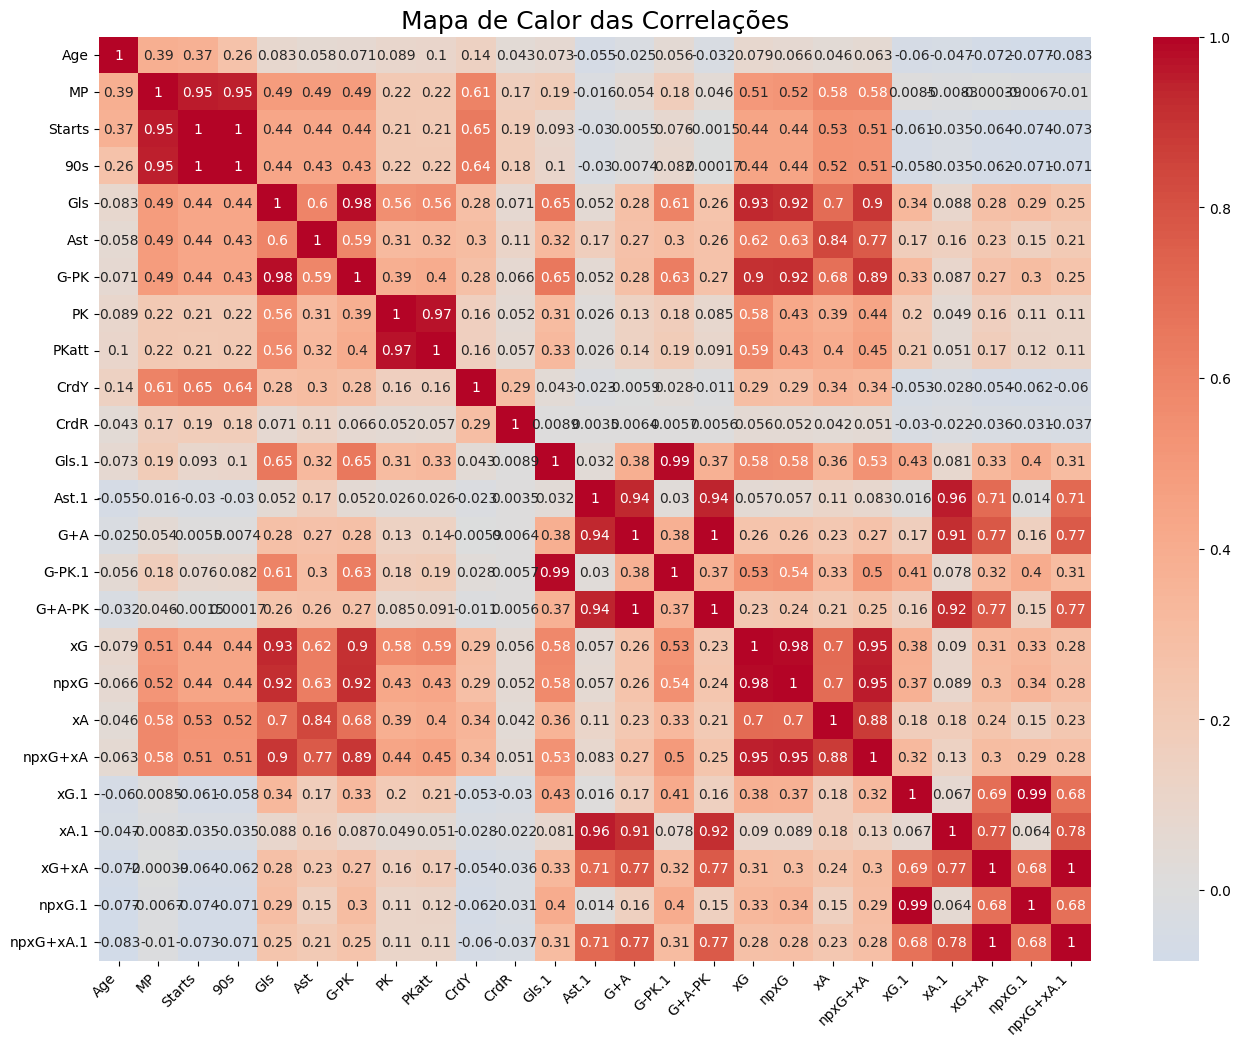

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Remover todas as linhas com valores nulos
numeric_df = df.select_dtypes(include=['float64', 'int64']).dropna()

# Selecionar apenas as colunas numéricas para calcular a correlação
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calcular a matriz de correlação
correlation_matrix = numeric_df.corr()

# Configurar o tamanho da figura para o mapa de calor
plt.figure(figsize=(16, 12))

# Criar o mapa de calor usando seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

# Adicionar título e rótulos aos eixos
plt.title('Mapa de Calor das Correlações', fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

Ao ilustrar o mapa de calor das correlações estatisticas acima, já retirados os jogadores sem metricas calculadas (Valores nulos ou Nan), conseguimos mostrar como as variaveis mais a direita da lista estão fortemente correlacionadas. Algumas delas derivam das outras, se tornando indices que compilam duas variaveis em uma, como xG+xA que indica as chances de gol somada as chances de assistencia divididas por partidas completas.

In [9]:
# Listar as classificações únicas da variável "Pos"
unique_positions = df['Pos'].unique()

# Exibir as classificações
print(unique_positions)

['FW,MF' 'DF' 'GK' 'MF' 'MF,DF' 'MF,FW' 'FW' 'DF,MF' 'DF,FW' 'FW,DF']


**A lista de posições dos jogadores parece não agrupar eles em funções principais claras, vamos criar uma nova variavel para adaptar esta classificação.**

In [13]:
import pandas as pd

# Aqui está um exemplo de como filtrar as observações

# Definindo as classificações
classificacoes = ['FW,DF', 'DF,MF', 'DF,FW']

# Filtrando o DataFrame
df_filtrado = df[df['Pos'].isin(classificacoes)]

# Ajustando a configuração para exibir todas as linhas
pd.set_option('display.max_rows', None)  # Exibe todas as linhas

# Exibindo o DataFrame filtrado
print(df_filtrado)

                Player                     Team   Nation    Pos   Age  MP  \
30     Héctor Bellerín                  Arsenal   es ESP  DF,MF  26.0   0   
54        Ashley Young              Aston Villa  eng ENG  DF,FW  36.0  24   
75   Frederic Guilbert              Aston Villa   fr FRA  DF,MF  26.0   0   
77       Kaine Kessler              Aston Villa  eng ENG  DF,MF  18.0   0   
101      Saman Ghoddos                Brentford   ir IRN  DF,MF  27.0  17   
129        Solly March   Brighton & Hove Albion  eng ENG  DF,FW  27.0  31   
130      Tariq Lamptey   Brighton & Hove Albion  eng ENG  DF,FW  20.0  30   
243       Martin Kelly           Crystal Palace  eng ENG  DF,MF  31.0   0   
287      Stuart Dallas             Leeds United  nir NIR  DF,MF  30.0  34   
302   Jamie Shackleton             Leeds United  eng ENG  DF,MF  21.0  14   
337    Marc Albrighton           Leicester City  eng ENG  FW,DF  31.0  17   
343    Hamza Choudhury           Leicester City  eng ENG  DF,MF  23.0   6   

**A lista acima mostra que não temos uma separação clara dos jogadores que jogam nas laterais, pois a lista acima deveria ser muito maior, assim vamos lista-los como defensores, meio campistas e atacantes.**

In [14]:
# Função para mapear as classificações para 'main_function'
def map_position(pos):
    if pos in ['DF','DF,MF']:
        return 'center_DF'
    elif pos in ['MF','MF,DF','MF,FW']:
        return 'center_MF'
    elif pos in ['FW', 'FW,MF','FW,DF']:
        return 'center_FW'
    elif pos == 'GK':
        return 'GK'
    else:
        return 'Unknown'  # Para lidar com qualquer posição não especificada

# Criar a nova variável 'main_function'
df['main_function'] = df['Pos'].apply(map_position)

Criamos a variavel "main_function" para separar os jogadores em goleiros, defensores centrais, meio campistas centrais e atacantes centrais.

In [15]:
# Ajustar as configurações de exibição para mostrar todas as colunas
pd.set_option('display.max_columns', None)

# Exibir as primeiras 5 linhas do dataframe para verificar
print(df.head(5))

               Player     Team   Nation    Pos   Age  MP  Starts    Min   90s  \
0         Bukayo Saka  Arsenal  eng ENG  FW,MF  19.0  38      36  2,978  33.1   
1  Gabriel Dos Santos  Arsenal   br BRA     DF  23.0  35      35  3,063  34.0   
2      Aaron Ramsdale  Arsenal  eng ENG     GK  23.0  34      34  3,060  34.0   
3           Ben White  Arsenal  eng ENG     DF  23.0  32      32  2,880  32.0   
4     Martin Ødegaard  Arsenal   no NOR     MF  22.0  36      32  2,785  30.9   

    Gls  Ast  G-PK   PK  PKatt  CrdY  CrdR  Gls.1  Ast.1   G+A  G-PK.1  \
0  11.0  7.0   9.0  2.0    2.0   6.0   0.0   0.33   0.21  0.54    0.27   
1   5.0  0.0   5.0  0.0    0.0   8.0   1.0   0.15   0.00  0.15    0.15   
2   0.0  0.0   0.0  0.0    0.0   1.0   0.0   0.00   0.00  0.00    0.00   
3   0.0  0.0   0.0  0.0    0.0   3.0   0.0   0.00   0.00  0.00    0.00   
4   7.0  4.0   7.0  0.0    0.0   4.0   0.0   0.23   0.13  0.36    0.23   

   G+A-PK   xG  npxG   xA  npxG+xA  xG.1  xA.1  xG+xA  npxG.1  npxG+

In [16]:
# Exibir a contagem de valores NaN por coluna que serão retirados dos calculos
print(df.isnull().sum())

Player             0
Team               0
Nation             3
Pos                0
Age                4
MP                 0
Starts             0
Min              145
90s              144
Gls              144
Ast              144
G-PK             144
PK               144
PKatt            144
CrdY             144
CrdR             144
Gls.1            145
Ast.1            145
G+A              145
G-PK.1           145
G+A-PK           145
xG               145
npxG             145
xA               145
npxG+xA          145
xG.1             145
xA.1             145
xG+xA            145
npxG.1           145
npxG+xA.1        145
main_function      0
dtype: int64


Acima foi possível descrever que existem obsevações (Linhas) que tem valores nulos, provavelmente foram jogadores que não tiveram participação no campeonato mas estavam listados para avaliação.
O mapa de calor não foi afetado por valores nulos.

In [17]:
# Filtrar as observações onde a variável 'Age' é NaN
nan_age_observations = df.loc[df['Age'].isnull()]

# Exibir as observações filtradas
print(nan_age_observations)

            Player                     Team   Nation Pos  Age  MP  Starts  \
183   Bobby Thomas                  Burnley  eng ENG  DF  NaN   0       0   
318     Kris Moore             Leeds United      NaN  MF  NaN   0       0   
548  Tyler Dibling              Southampton      NaN  MF  NaN   0       0   
690   James Storer  Wolverhampton Wanderers      NaN  GK  NaN   0       0   

     Min  90s  Gls  Ast  G-PK  PK  PKatt  CrdY  CrdR  Gls.1  Ast.1  G+A  \
183  NaN  NaN  NaN  NaN   NaN NaN    NaN   NaN   NaN    NaN    NaN  NaN   
318  NaN  NaN  NaN  NaN   NaN NaN    NaN   NaN   NaN    NaN    NaN  NaN   
548  NaN  NaN  NaN  NaN   NaN NaN    NaN   NaN   NaN    NaN    NaN  NaN   
690  NaN  NaN  NaN  NaN   NaN NaN    NaN   NaN   NaN    NaN    NaN  NaN   

     G-PK.1  G+A-PK  xG  npxG  xA  npxG+xA  xG.1  xA.1  xG+xA  npxG.1  \
183     NaN     NaN NaN   NaN NaN      NaN   NaN   NaN    NaN     NaN   
318     NaN     NaN NaN   NaN NaN      NaN   NaN   NaN    NaN     NaN   
548     NaN     NaN

**Após observar uma serie de jogadores sem dados atribuidos, vamos retirar eles do banco de dados.**

In [18]:
# Remove as linhas que contêm valores nulos
df_cleaned = df.dropna()

# Redefinir o índice após a remoção
df_cleaned.reset_index(drop=True, inplace=True)

## Aninhamento de jogadores com resultados semelhantes

Ao se ilustrar aninhamentos em tres dimensões podemos comparar e reunir jogadores com metricas de desempenho semelhantes.

Os aninhamentos se fazem mais uteis do que simples filtros pois não são arbitrarios, já os filtros podem cortar da analise jogadores que deveriam estar listados mas não entraram na escolha dos criterios metricos.

**As listas apresentadas após cada aninhamento serão ordenadas por uma das variaveis do aninahmento, facilitando a visualização dos jogadores de melhores desempenhos.**

**Avaliação de jogadores defensores**

Como não temos dados para avaliar comportamento defensivo, vamos agrupar os jogadores por idade que completaram mais partidas na métrica minutos jogados no campeonato por 90 minutos (90s) e que tiveram menos punições com cartões amarelos.

Estes agrupamentos nos mostrarão os jogadores mais experientes nesta competição, separados por média de idade e numero de cartões amarelos.

In [19]:
# Filtrar o dataframe para incluir apenas as observações onde 'main_function' é 'center_DF'
df_center_DF = df_cleaned[df_cleaned['main_function'] == 'center_DF']

# Selecionar as variáveis para clusterização
X = df_center_DF[['Age', '90s', 'CrdY']]

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determinar o número ideal de clusters usando o método do cotovelo e a pontuação de Silhouette
sse = []
silhouette_scores = []
K = range(2, 11)  # Testar de 2 a 10 clusters

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

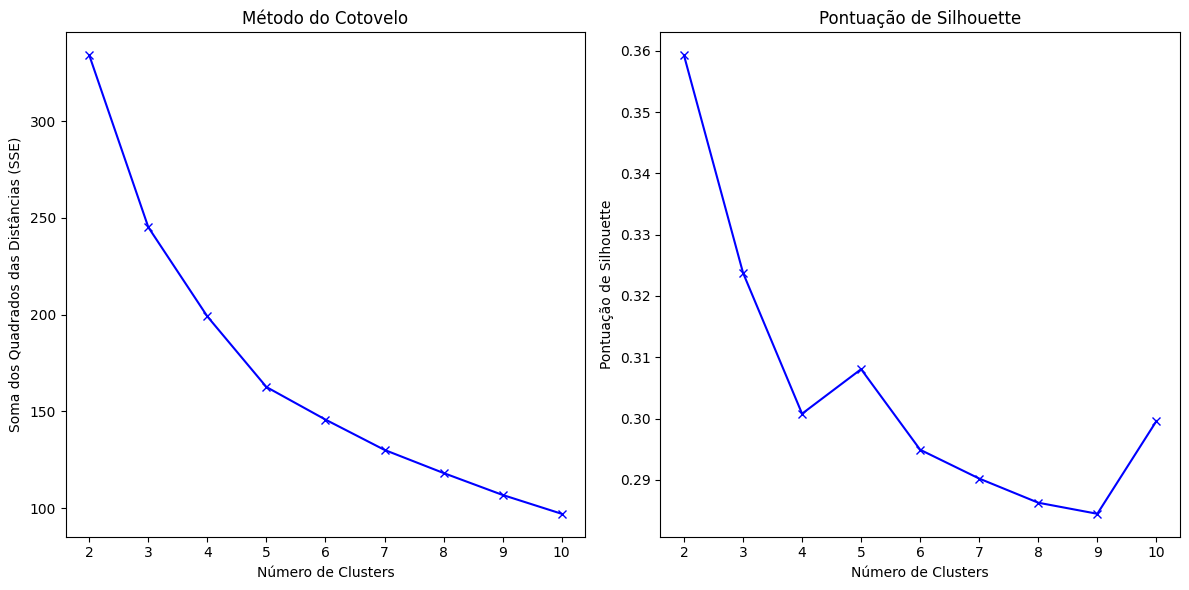

In [22]:
import matplotlib.pyplot as plt

# Plotar o método do cotovelo
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(K, sse, 'bx-')
plt.xlabel('Número de Clusters')
plt.ylabel('Soma dos Quadrados das Distâncias (SSE)')
plt.title('Método do Cotovelo')

# Plotar a pontuação de Silhouette
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Número de Clusters')
plt.ylabel('Pontuação de Silhouette')
plt.title('Pontuação de Silhouette')
plt.tight_layout()
plt.show()

Os graficos acima nos dão pistas de quais numeros de aninhamentos (clusters) são mais indicados para reunir jogadores com desempenhos mais semelhantes nos mesmos ninhos.

Os metodos acima se complementam no auxili para decidir o numero de aninhamentos (clusters).

In [72]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go

# Escolher o número ideal de clusters (baseado na análise dos gráficos)
n_clusters_ideal = 5  

# Padronizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_center_DF[['Age', '90s', 'CrdY']])

# Aplicar K-means com o número ideal de clusters
kmeans = KMeans(n_clusters=n_clusters_ideal, random_state=42)
df_center_DF['Cluster'] = kmeans.fit_predict(X_scaled)

# Criar gráfico 3D para visualizar os clusters com Plotly
fig = go.Figure(data=[go.Scatter3d(
    x=df_center_DF['Age'],
    y=df_center_DF['90s'],
    z=df_center_DF['CrdY'],
    mode='markers',
    marker=dict(
        size=8,
        color=df_center_DF['Cluster'],  # Cor baseada nos clusters
        colorscale='Viridis',  # Mapa de cores
        opacity=0.8,
        line=dict(width=0.5)
    ),
    text=df_center_DF['Cluster']  # Rótulos dos clusters
)])

# Adicionar rótulos e título
fig.update_layout(
    scene=dict(
        xaxis_title='Age',
        yaxis_title='90s',
        zaxis_title='CrdY'
    ),
    title='Clusterização K-means em 3D',
    margin=dict(l=0, r=0, b=0, t=40)
)

# Exibir o gráfico interativo
fig.show()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/tmp/ipykernel_33/3807177971.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Obs: clique e arraste a ilustração acima para mudar a perspectiva de vizualização.

Como não temos metricas defensivas, vamos avaliar os jogadores mais consistentes, menos punidos com cartão amarelo e jovens do setor defensivo.

O agrupamento 2 (verde turquesa) acima mostra os jogadores com baixa idade média, muita experiencia em minutos jogados, com mais partidas completas (90s) e com menos cartões amarelos recebidos no campeonato 21/22

abaixo a lista de jogadores que compoem este aninhamento 2 (verde turquesa).

In [75]:
# Mostrar todas as variáveis para as observações que pertencem ao cluster 2 verde turqueza
df_cluster_2 = df_cleaned[df_cleaned['main_function'] == 'center_DF'].copy()
df_cluster_2['Cluster'] = kmeans.predict(scaler.transform(df_cluster_2[['Age', '90s', 'CrdY']].fillna(0)))
df_cluster_2_filtered = df_cluster_2[df_cluster_2['Cluster'] == 2]

# Ordenando o DataFrame pela variável "90s" em ordem decrescente e exibindo as 50 primeiras linhas
print(df_cluster_2_filtered.sort_values(by='90s', ascending=False).head(50))

                     Player                     Team   Nation Pos   Age  MP  \
162              Marc Guéhi           Crystal Palace  eng ENG  DF  21.0  36   
163         Tyrick Mitchell           Crystal Palace  eng ENG  DF  21.0  36   
165        Joachim Andersen           Crystal Palace   dk DEN  DF  25.0  34   
3                 Ben White                  Arsenal  eng ENG  DF  23.0  32   
278  Trent Alexander-Arnold                Liverpool  eng ENG  DF  22.0  32   
61               Rico Henry                Brentford  eng ENG  DF  24.0  34   
525              Max Kilman  Wolverhampton Wanderers  eng ENG  DF  24.0  30   
419      Kyle Walker-Peters              Southampton  eng ENG  DF  24.0  32   
250          Ça?lar Söyüncü           Leicester City   tr TUR  DF  25.0  28   
308              Rúben Dias          Manchester City   pt POR  DF  24.0  29   
446                 Emerson        Tottenham Hotspur   br BRA  DF  22.0  31   
420    Valentino Livramento              Southampton

Abaixo, tambem podemos listar os jogadores com média de idade maior mas que igaualmente jogaram muitas partidas e foram poucas vezes punidos com cartões amarelos.

In [74]:
# Mostrar todas as variáveis para as observações que pertencem ao cluster 4 amarelo
df_cluster_4 = df_cleaned[df_cleaned['main_function'] == 'center_DF'].copy()
df_cluster_4['Cluster'] = kmeans.predict(scaler.transform(df_cluster_4[['Age', '90s', 'CrdY']].fillna(0)))
df_cluster_4_filtered = df_cluster_4[df_cluster_4['Cluster'] == 4]

# Ordenando o DataFrame pela variável "90s" em ordem decrescente e exibindo as 50 primeiras linhas
print(df_cluster_4_filtered.sort_values(by='90s', ascending=False).head(50))

                Player                     Team   Nation    Pos   Age  MP  \
520        Conor Coady  Wolverhampton Wanderers  eng ENG     DF  28.0  38   
443          Eric Dier        Tottenham Hotspur  eng ENG     DF  27.0  35   
277    Virgil van Dijk                Liverpool   nl NED     DF  30.0  34   
220      Stuart Dallas             Leeds United  nir NIR  DF,MF  30.0  34   
388       Grant Hanley             Norwich City  sct SCO     DF  29.0  33   
89        Joël Veltman   Brighton & Hove Albion   nl NED     DF  29.0  34   
307    Aymeric Laporte          Manchester City   es ESP     DF  27.0  33   
187      Michael Keane                  Everton  eng ENG     DF  28.0  32   
280         Joël Matip                Liverpool   cm CMR     DF  29.0  31   
502       Craig Dawson          West Ham United  eng ENG     DF  31.0  34   
117     Charlie Taylor                  Burnley  eng ENG     DF  27.0  31   
501    Aaron Cresswell          West Ham United  eng ENG     DF  31.0  31   

**Vamos avaliar os meio campistas e suas métricas mais importantes**

Como não temos disponiveis metricas defensivas objetivas, usaremos as metricas de idade "Age", partidas completas "90s" e chances de assistencias no campeonato somadas, para avaliarmos os meio campistas com atitudes ofensivas.

In [29]:
# Filtrar o dataframe para incluir apenas as observações onde 'main_function' é 'center_MF'
df_center_MF = df_cleaned[df_cleaned['main_function'] == 'center_MF']

# Selecionar as variáveis para clusterização
X = df_center_MF[['Age', '90s', 'xA']]

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determinar o número ideal de clusters usando o método do cotovelo e a pontuação de Silhouette
sse = []
silhouette_scores = []
K = range(2, 11)  # Testar de 2 a 10 clusters

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

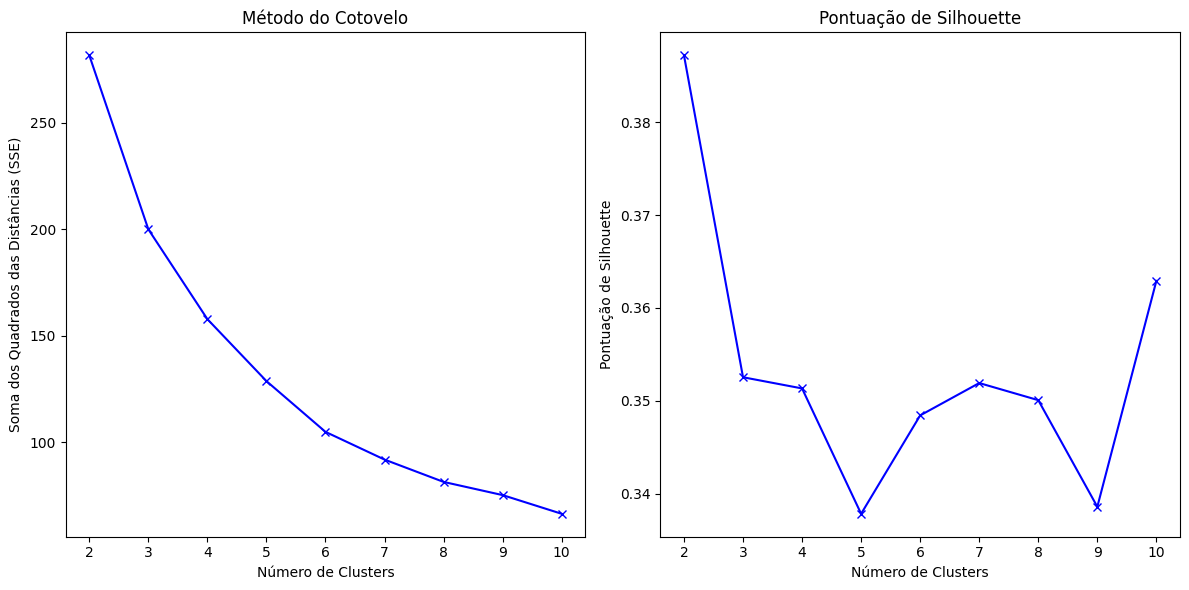

In [31]:
# Plotar o método do cotovelo
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(K, sse, 'bx-')
plt.xlabel('Número de Clusters')
plt.ylabel('Soma dos Quadrados das Distâncias (SSE)')
plt.title('Método do Cotovelo')

# Plotar a pontuação de Silhouette
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Número de Clusters')
plt.ylabel('Pontuação de Silhouette')
plt.title('Pontuação de Silhouette')
plt.tight_layout()
plt.show()

Os graficos acima nos dão pistas de quais numeros de aninhamentos (clusters) são mais indicados para reunir jogadores com desempenhos mais semelhantes nos mesmos ninhos.

In [65]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go

# Escolher o número ideal de clusters (baseado na análise dos gráficos)
n_clusters_ideal = 6  # Exemplo: escolha o valor com base na análise visual

# Padronizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_center_DF[['Age', '90s', 'xA']])

# Aplicar K-means com o número ideal de clusters
kmeans = KMeans(n_clusters=n_clusters_ideal, random_state=42)
df_center_DF['Cluster'] = kmeans.fit_predict(X_scaled)

# Criar gráfico 3D para visualizar os clusters com Plotly
fig = go.Figure(data=[go.Scatter3d(
    x=df_center_DF['Age'],
    y=df_center_DF['90s'],
    z=df_center_DF['xA'],
    mode='markers',
    marker=dict(
        size=8,
        color=df_center_DF['Cluster'],  # Cor baseada nos clusters
        colorscale='Viridis',  # Mapa de cores
        opacity=0.8,
        line=dict(width=0.5)
    ),
    text=df_center_DF['Cluster']  # Rótulos dos clusters
)])

# Adicionar rótulos e título
fig.update_layout(
    scene=dict(
        xaxis_title='Age',
        yaxis_title='90s',
        zaxis_title='xA'
    ),
    title='Clusterização K-means em 3D',
    margin=dict(l=0, r=0, b=0, t=40)
)

# Exibir o gráfico interativo
fig.show()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/tmp/ipykernel_33/2799478796.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Obs: clique e arraste a ilustração acima para mudar o angulo da visualização.

Como não temos metricas defensivas, vamos avaliar os jogadores mais ofensivos e jovens do setor meio campo.

O agrupamento 5 (amarelo) acima mostra os jogadores com baixa idade média, muita experiencia em minutos jogados, com mais partidas completas (90s) e com mais chances de assistencias (xA) no campeonato 21/22

Abaixo a lista dos jogadores que compoem este aninhamento.

In [71]:
# Mostrar todas as variáveis para as observações que pertencem ao cluster 5 amarelo
df_cluster_5 = df_cleaned[df_cleaned['main_function'] == 'center_MF'].copy()
df_cluster_5['Cluster'] = kmeans.predict(scaler.transform(df_cluster_5[['Age', '90s', 'xA']].fillna(0)))
df_cluster_5_filtered = df_cluster_5[df_cluster_5['Cluster'] == 5]

# Ordenando o DataFrame pela variável "xA" em ordem decrescente e exibindo as 30 primeiras linhas
print(df_cluster_5_filtered.sort_values(by='xA', ascending=False).head(30))

                  Player                     Team   Nation    Pos   Age  MP  \
192       Anthony Gordon                  Everton  eng ENG  MF,FW  20.0  35   
32          Douglas Luiz              Aston Villa   br BRA     MF  23.0  34   
451    Rodrigo Bentancur        Tottenham Hotspur   uy URU     MF  24.0  17   
8       Emile Smith Rowe                  Arsenal  eng ENG  MF,FW  21.0  33   
64         Vitaly Janelt                Brentford   de GER     MF  23.0  31   
524          Rúben Neves  Wolverhampton Wanderers   pt POR     MF  24.0  33   
34          Jacob Ramsey              Aston Villa  eng ENG     MF  20.0  34   
496          Declan Rice          West Ham United  eng ENG     MF  22.0  36   
396        Billy Gilmour             Norwich City  sct SCO     MF  20.0  24   
152   Ruben Loftus-Cheek                  Chelsea  eng ENG  MF,DF  25.0  24   
378      Bruno Guimarães         Newcastle United   br BRA     MF  23.0  17   
397      Mathias Normann             Norwich City   

Abaixo a lista do agrupamento 0 (roxo) que mostra os jogadores com alta idade média, muita experiencia em minutos jogados, com mais partidas completas (90s) e com mais chances de assistencias (xA) no campeonato 21/22

In [70]:
# Mostrar todas as variáveis para as observações que pertencem ao cluster 0 roxo
df_cluster_0 = df_cleaned[df_cleaned['main_function'] == 'center_MF'].copy()
df_cluster_0['Cluster'] = kmeans.predict(scaler.transform(df_cluster_0[['Age', '90s', 'xA']].fillna(0)))
df_cluster_0_filtered = df_cluster_0[df_cluster_0['Cluster'] == 0]

# Ordenando o DataFrame pela variável "xA" em ordem decrescente e exibindo as 30 primeiras linhas
print(df_cluster_0_filtered.sort_values(by='xA', ascending=False).head(30))

                Player                     Team   Nation    Pos   Age  MP  \
522      João Moutinho  Wolverhampton Wanderers   pt POR     MF  34.0  35   
227      Mateusz Klich             Leeds United   pl POL     MF  31.0  33   
335               Fred        Manchester United   br BRA     MF  28.0  28   
473      Tom Cleverley                  Watford  eng ENG     MF  31.0  28   
171    Jeffrey Schlupp           Crystal Palace   gh GHA  MF,FW  28.0  32   
393  Pierre Lees-Melou             Norwich City   fr FRA     MF  28.0  33   
497       Tomá Sou?ek          West Ham United   cz CZE     MF  26.0  35   
285            Fabinho                Liverpool   br BRA     MF  27.0  29   
6        Thomas Partey                  Arsenal   gh GHA     MF  28.0  24   
193              Allan                  Everton   br BRA     MF  30.0  28   
471        Juraj Kucka                  Watford   sk SVK     MF  34.0  26   
364      Jonjo Shelvey         Newcastle United  eng ENG     MF  29.0  24   

Abaixo a lista de jogadores do aninhamento 2 verde turquesa, com altos numeros de chances de assistencias, altos numeros de partidas completas mas com idades variadas entre si.

In [69]:
# Mostrar todas as variáveis para as observações que pertencem ao cluster 2 verde turquesa
df_cluster_2 = df_cleaned[df_cleaned['main_function'] == 'center_MF'].copy()
df_cluster_2['Cluster'] = kmeans.predict(scaler.transform(df_cluster_2[['Age', '90s', 'xA']].fillna(0)))
df_cluster_2_filtered = df_cluster_2[df_cluster_2['Cluster'] == 2]

# Ordenando o DataFrame pela variável "xA" em ordem decrescente e exibindo as 30 primeiras linhas
print(df_cluster_2_filtered.sort_values(by='xA', ascending=False).head(30))

                    Player                    Team   Nation    Pos   Age  MP  \
4          Martin Ødegaard                 Arsenal   no NOR     MF  22.0  36   
139            Mason Mount                 Chelsea  eng ENG  MF,FW  22.0  32   
415      James Ward-Prowse             Southampton  eng ENG     MF  26.0  36   
94             Pascal Groß  Brighton & Hove Albion   de GER  MF,DF  30.0  29   
306         Bernardo Silva         Manchester City   pt POR  MF,FW  26.0  35   
30             John McGinn             Aston Villa  sct SCO     MF  26.0  35   
249        Youri Tielemans          Leicester City   be BEL     MF  24.0  32   
251         James Maddison          Leicester City  eng ENG  MF,FW  24.0  35   
114          Dwight McNeil                 Burnley  eng ENG     MF  21.0  38   
225                Rodrigo            Leeds United   es ESP  MF,FW  30.0  31   
191           Demarai Gray                 Everton  eng ENG  MF,FW  25.0  34   
424         Nathan Redmond             S

**Houve ainda um aninhamento (4 verde) que correlacionou apenas o desempenho de dois jogadores, abaixo a lista citada.**

Estes jogadores tirevem um metrica de xA (chances de assistencias) relativamente parecidas mas muito maiores que os demais meio campistas avalidados, esta metrica, suas idades e seus alto numeros de partidas completas foram considerados semelhantes.

In [61]:
# Mostrar todas as variáveis para as observações que pertencem ao cluster 4 verde
df_cluster_4 = df_cleaned[df_cleaned['main_function'] == 'center_MF'].copy()
df_cluster_4['Cluster'] = kmeans.predict(scaler.transform(df_cluster_4[['Age', '90s', 'xA']].fillna(0)))
df_cluster_4_filtered = df_cluster_4[df_cluster_4['Cluster'] == 4]

# Mostrar 30 exemplos de jogadores que estão no animhamento 4 verde
print(df_cluster_4_filtered.head(30))

              Player               Team  Nation Pos   Age  MP  Starts    Min  \
309  Kevin De Bruyne    Manchester City  be BEL  MF  30.0  30      25  2,201   
330  Bruno Fernandes  Manchester United  pt POR  MF  26.0  36      35  3,111   

      90s   Gls  Ast  G-PK   PK  PKatt  CrdY  CrdR  Gls.1  Ast.1   G+A  \
309  24.5  15.0  8.0  15.0  0.0    0.0   2.0   0.0   0.61   0.33  0.94   
330  34.6  10.0  6.0  10.0  0.0    2.0  10.0   0.0   0.29   0.17  0.46   

     G-PK.1  G+A-PK   xG  npxG   xA  npxG+xA  xG.1  xA.1  xG+xA  npxG.1  \
309    0.61    0.94  6.4   6.4  9.5     15.9  0.26  0.39   0.65    0.26   
330    0.29    0.46  9.7   8.2  8.4     16.6  0.28  0.24   0.53    0.24   

     npxG+xA.1 main_function  Cluster  
309       0.65     center_MF        4  
330       0.48     center_MF        4  


**Vamos avaliar os atacantes e suas métricas mais importantes**

Usaremos a idade "Age", o numero de partidas completas (minutos totais dividos por 90 "90s") e a soma de chances de gols e assistencia por partida (xG+xA), o xG+xA diminuiu quanto mais minutos e partidas um jogador participou, assim quanto mais um jogador participu do campeonato, amis dificil foi manter esta metrica alta.

In [36]:
# Filtrar o dataframe para incluir apenas as observações onde 'main_function' é 'center_FW'
df_center_FW = df_cleaned[df_cleaned['main_function'] == 'center_FW']

# Selecionar as variáveis para clusterização
X = df_center_FW[['Age', '90s', 'xG+xA']]

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determinar o número ideal de clusters usando o método do cotovelo e a pontuação de Silhouette
sse = []
silhouette_scores = []
K = range(2, 11)  # Testar de 2 a 10 clusters

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

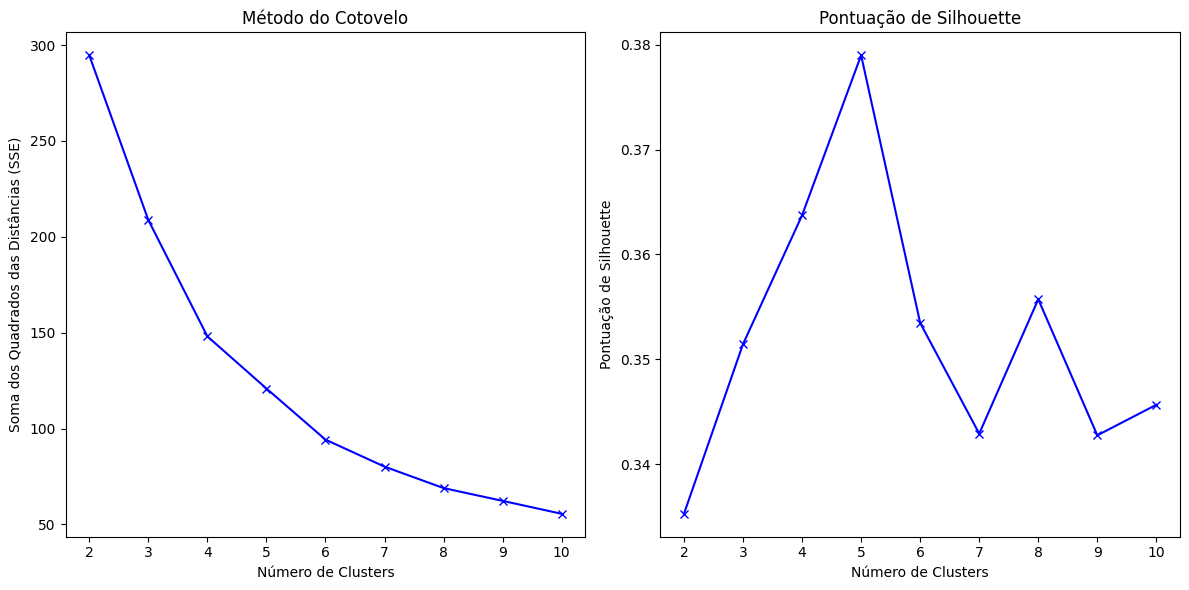

In [38]:
# Plotar o método do cotovelo
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(K, sse, 'bx-')
plt.xlabel('Número de Clusters')
plt.ylabel('Soma dos Quadrados das Distâncias (SSE)')
plt.title('Método do Cotovelo')

# Plotar a pontuação de Silhouette
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Número de Clusters')
plt.ylabel('Pontuação de Silhouette')
plt.title('Pontuação de Silhouette')
plt.tight_layout()
plt.show()

Os graficos acima nos dão pistas de quais numeros de aninhamentos (clusters) são mais indicados para reunir jogadores com desempenhos mais semelhantes nos mesmos ninhos.

In [76]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go

# Escolher o número ideal de clusters (baseado na análise dos gráficos)
n_clusters_ideal = 5  # Exemplo: escolha o valor com base na análise visual

# Padronizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_center_FW[['Age', '90s', 'xG+xA']])

# Aplicar K-means com o número ideal de clusters
kmeans = KMeans(n_clusters=n_clusters_ideal, random_state=42)
df_center_FW['Cluster'] = kmeans.fit_predict(X_scaled)

# Criar gráfico 3D para visualizar os clusters com Plotly
fig = go.Figure(data=[go.Scatter3d(
    x=df_center_FW['Age'],
    y=df_center_FW['90s'],
    z=df_center_FW['xG+xA'],
    mode='markers',
    marker=dict(
        size=8,
        color=df_center_FW['Cluster'],  # Cor baseada nos clusters
        colorscale='Viridis',  # Mapa de cores
        opacity=0.8,
        line=dict(width=0.5)
    ),
    text=df_center_FW['Cluster']  # Rótulos dos clusters
)])

# Adicionar rótulos e título
fig.update_layout(
    scene=dict(
        xaxis_title='Age',
        yaxis_title='90s',
        zaxis_title='xG+xA'
    ),
    title='Clusterização K-means em 3D',
    margin=dict(l=0, r=0, b=0, t=40)
)

# Exibir o gráfico interativo
fig.show()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/tmp/ipykernel_33/2739225381.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Obs: clique e arraste a ilustração acima para mudar o angulo da visualização.

o aninhamento 1 azul é o que melhor reuni jogadores com alto numero de minutos jogados, partidas completas por minutos e maior chances de assistencias xA somadas as chances de gols xG (por partida). 

o aninhamento verde turqueza numero dois reuniu jogadores que tiveram alto numero de xG+xA mas com muito poucas partidas completas.

Abaixo a lista dos jogadores que compoem o aninhamento 1 azul citado antes.

In [78]:
# Mostrar todas as variáveis para as observações que pertencem ao cluster 1 azul
df_cluster_1 = df_cleaned[df_cleaned['main_function'] == 'center_FW'].copy()
df_cluster_1['Cluster'] = kmeans.predict(scaler.transform(df_cluster_1[['Age', '90s', 'xG+xA']].fillna(0)))
df_cluster_1_filtered = df_cluster_1[df_cluster_1['Cluster'] == 1]

# Ordenando o DataFrame pela variável "xG+xA" em ordem decrescente e exibindo as 30 primeiras linhas
print(df_cluster_1_filtered.sort_values(by='xG+xA', ascending=False).head(30))

                    Player               Team   Nation    Pos   Age  MP  \
281          Mohamed Salah          Liverpool   eg EGY     FW  29.0  35   
284             Diogo Jota          Liverpool   pt POR     FW  24.0  35   
311        Raheem Sterling    Manchester City  eng ENG     FW  26.0  30   
441             Harry Kane  Tottenham Hotspur  eng ENG     FW  28.0  37   
313          Gabriel Jesus    Manchester City   br BRA     FW  24.0  28   
444          Son Heung-min  Tottenham Hotspur   kr KOR  FW,MF  29.0  35   
279             Sadio Mané          Liverpool   sn SEN     FW  29.0  34   
310             Phil Foden    Manchester City  eng ENG     FW  21.0  28   
198  Dominic Calvert-Lewin            Everton  eng ENG     FW  24.0  17   
144            Kai Havertz            Chelsea   de GER  FW,MF  22.0  29   
150            Timo Werner            Chelsea   de GER  FW,MF  25.0  21   
221   Raphael Dias Belloli       Leeds United   br BRA  FW,MF  24.0  35   
62              Ivan Tone

**Abaixo vamos subdivir mais usando mais aninhamentos**

In [80]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go

# Escolher o número ideal de clusters (baseado na análise dos gráficos)
n_clusters_ideal = 8  # Exemplo: escolha o valor com base na análise visual

# Padronizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_center_FW[['Age', '90s', 'xG+xA']])

# Aplicar K-means com o número ideal de clusters
kmeans = KMeans(n_clusters=n_clusters_ideal, random_state=42)
df_center_FW['Cluster'] = kmeans.fit_predict(X_scaled)

# Criar gráfico 3D para visualizar os clusters com Plotly
fig = go.Figure(data=[go.Scatter3d(
    x=df_center_FW['Age'],
    y=df_center_FW['90s'],
    z=df_center_FW['xG+xA'],
    mode='markers',
    marker=dict(
        size=8,
        color=df_center_FW['Cluster'],  # Cor baseada nos clusters
        colorscale='Viridis',  # Mapa de cores
        opacity=0.8,
        line=dict(width=0.5)
    ),
    text=df_center_FW['Cluster']  # Rótulos dos clusters
)])

# Adicionar rótulos e título
fig.update_layout(
    scene=dict(
        xaxis_title='Age',
        yaxis_title='90s',
        zaxis_title='xG+xA'
    ),
    title='Clusterização K-means em 3D',
    margin=dict(l=0, r=0, b=0, t=40)
)

# Exibir o gráfico interativo
fig.show()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/tmp/ipykernel_33/1727678702.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




Obs: clique e arraste a ilustração acima para mudar o angulo da visualização.

Ao se montar 8 aninhamentos ao invez de 5, como ilustrado acima, temos o aninhamento 7 amarelo que é o que melhor reuni jogadores maduros que tem alto numero de minutos jogados, partidas completas por minutos e maior chances de assistencias xA somadas as chances de gols xG por partida.

Abaixo a lista dos jogadores que compoem este aninhamento.

In [84]:
# Mostrar todas as variáveis para as observações que pertencem ao cluster 7 amarelo
df_cluster_7 = df_cleaned[df_cleaned['main_function'] == 'center_FW'].copy()
df_cluster_7['Cluster'] = kmeans.predict(scaler.transform(df_cluster_7[['Age', '90s', 'xG+xA']].fillna(0)))
df_cluster_7_filtered = df_cluster_7[df_cluster_7['Cluster'] == 7]


# Ordenando o DataFrame pela variável "xG+xA" em ordem decrescente e exibindo as 30 primeiras linhas
print(df_cluster_7_filtered.sort_values(by='xG+xA', ascending=False).head(30))

                Player                     Team   Nation    Pos   Age  MP  \
281      Mohamed Salah                Liverpool   eg EGY     FW  29.0  35   
441         Harry Kane        Tottenham Hotspur  eng ENG     FW  28.0  37   
444      Son Heung-min        Tottenham Hotspur   kr KOR  FW,MF  29.0  35   
333  Cristiano Ronaldo        Manchester United   pt POR     FW  36.0  30   
279         Sadio Mané                Liverpool   sn SEN     FW  29.0  34   
499    Michail Antonio          West Ham United   jm JAM     FW  31.0  36   
166      Wilfried Zaha           Crystal Palace   ci CIV     FW  28.0  33   
468        Joshua King                  Watford   no NOR     FW  29.0  32   
387        Teemu Pukki             Norwich City   fi FIN     FW  31.0  37   
526       Raúl Jiménez  Wolverhampton Wanderers   mx MEX     FW  30.0  34   

     Starts    Min   90s   Gls   Ast  G-PK   PK  PKatt  CrdY  CrdR  Gls.1  \
281      30  2,762  30.7  23.0  13.0  18.0  5.0    6.0   1.0   0.0   0.75  

Abaixo a lista de jogadores do aninhamento roxo, mais jovens, com muita experiencia e altos numeros em chances de gols e/ou assistencias.

In [86]:
# Mostrar todas as variáveis para as observações que pertencem ao cluster 0 roxo
df_cluster_0 = df_cleaned[df_cleaned['main_function'] == 'center_FW'].copy()
df_cluster_0['Cluster'] = kmeans.predict(scaler.transform(df_cluster_0[['Age', '90s', 'xG+xA']].fillna(0)))
df_cluster_0_filtered = df_cluster_0[df_cluster_0['Cluster'] == 0]

# Ordenando o DataFrame pela variável "xG+xA" em ordem decrescente e exibindo as 30 primeiras linhas
print(df_cluster_0_filtered.sort_values(by='xG+xA', ascending=False).head(30))

                   Player                     Team   Nation    Pos   Age  MP  \
284            Diogo Jota                Liverpool   pt POR     FW  24.0  35   
311       Raheem Sterling          Manchester City  eng ENG     FW  26.0  30   
313         Gabriel Jesus          Manchester City   br BRA     FW  24.0  28   
310            Phil Foden          Manchester City  eng ENG     FW  21.0  28   
221  Raphael Dias Belloli             Leeds United   br BRA  FW,MF  24.0  35   
62             Ivan Toney                Brentford  eng ENG     FW  25.0  33   
312         Jack Grealish          Manchester City  eng ENG     FW  25.0  26   
498          Jarrod Bowen          West Ham United  eng ENG     FW  24.0  36   
0             Bukayo Saka                  Arsenal  eng ENG  FW,MF  19.0  38   
252         Harvey Barnes           Leicester City  eng ENG  FW,MF  23.0  32   
31          Ollie Watkins              Aston Villa  eng ENG     FW  25.0  35   
190           Richarlison               

**Vamos avaliar os jogadores Goleiros**

Vamos usar as metricas de idade "Age", de partidas completas por 90 minutos "90s" e de cartões amarelos recebidos em todo o campeonato.

In [51]:
# Filtrar o dataframe para incluir apenas as observações onde 'main_function' é 'center_DF'
df_GK = df_cleaned[df_cleaned['main_function'] == 'GK']

# Selecionar as variáveis para clusterização
X = df_center_DF[['Age', '90s', 'CrdY']]

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determinar o número ideal de clusters usando o método do cotovelo e a pontuação de Silhouette
sse = []
silhouette_scores = []
K = range(2, 11)  # Testar de 2 a 10 clusters

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

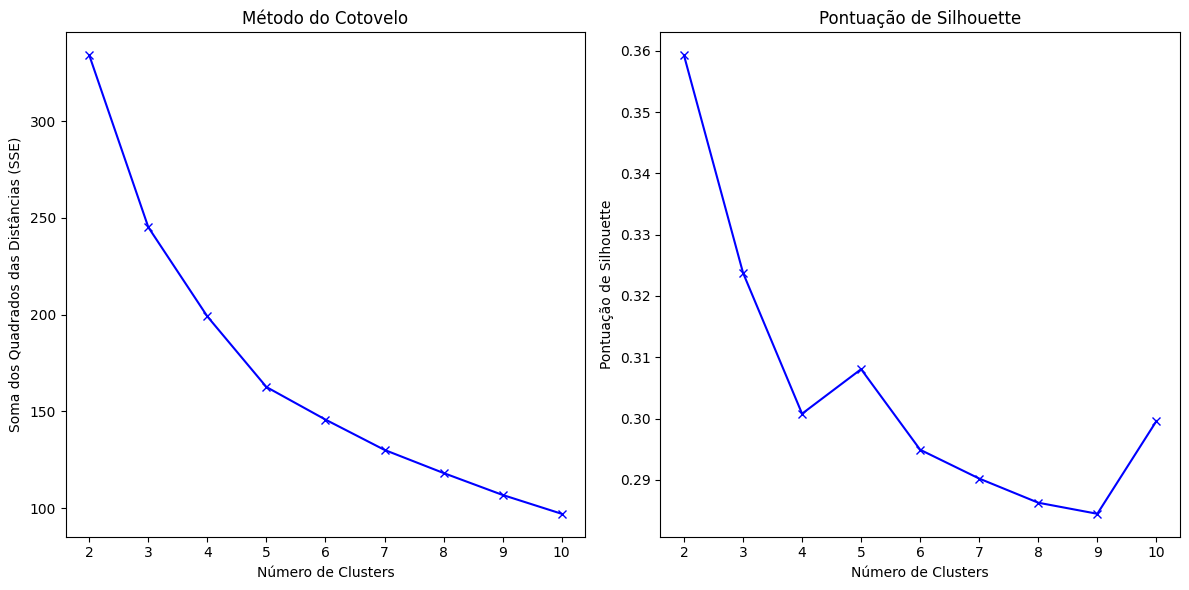

In [53]:
import matplotlib.pyplot as plt

# Plotar o método do cotovelo
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(K, sse, 'bx-')
plt.xlabel('Número de Clusters')
plt.ylabel('Soma dos Quadrados das Distâncias (SSE)')
plt.title('Método do Cotovelo')

# Plotar a pontuação de Silhouette
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Número de Clusters')
plt.ylabel('Pontuação de Silhouette')
plt.title('Pontuação de Silhouette')
plt.tight_layout()
plt.show()

In [88]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go

# Escolher o número ideal de clusters (baseado na análise dos gráficos)
n_clusters_ideal = 5  

# Padronizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_GK[['Age', '90s', 'CrdY']])

# Aplicar K-means com o número ideal de clusters
kmeans = KMeans(n_clusters=n_clusters_ideal, random_state=42)
df_GK['Cluster'] = kmeans.fit_predict(X_scaled)

# Criar gráfico 3D para visualizar os clusters com Plotly
fig = go.Figure(data=[go.Scatter3d(
    x=df_GK['Age'],
    y=df_GK['90s'],
    z=df_GK['CrdY'],
    mode='markers',
    marker=dict(
        size=8,
        color=df_GK['Cluster'],  # Cor baseada nos clusters
        colorscale='Viridis',  # Mapa de cores
        opacity=0.8,
        line=dict(width=0.5)
    ),
    text=df_GK['Cluster']  # Rótulos dos clusters
)])

# Adicionar rótulos e título
fig.update_layout(
    scene=dict(
        xaxis_title='Age',
        yaxis_title='90s',
        zaxis_title='CrdY'
    ),
    title='Clusterização K-means em 3D',
    margin=dict(l=0, r=0, b=0, t=40)
)

# Exibir o gráfico interativo
fig.show()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/tmp/ipykernel_33/1091325086.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Obs: clique e arraste a ilustração acima para mudar o angulo da visualização.

O aninhamento 3 verde claro acima mostra os Goleiros mais jovens que jogaram mais partidas completas e recebemram menos cartões amarelos.

Abaixo a lista de jogadores que compoem este aninhamento:

In [91]:
# Mostrar todas as variáveis para as observações que pertencem ao cluster 3 verde
df_cluster_3 = df_cleaned[df_cleaned['main_function'] == 'GK'].copy()
df_cluster_3['Cluster'] = kmeans.predict(scaler.transform(df_cluster_3[['Age', '90s', 'CrdY']].fillna(0)))
df_cluster_3_filtered = df_cluster_3[df_cluster_3['Cluster'] == 3]

# Ordenando o DataFrame pela variável "90s" em ordem decrescente e exibindo as 30 primeiras linhas
print(df_cluster_3_filtered.sort_values(by='90s', ascending=False).head(30))

             Player               Team   Nation Pos   Age  MP  Starts    Min  \
329    David de Gea  Manchester United   es ESP  GK  30.0  38      38  3,420   
113       Nick Pope            Burnley  eng ENG  GK  29.0  36      36  3,240   
276         Alisson          Liverpool   br BRA  GK  28.0  36      36  3,240   
2    Aaron Ramsdale            Arsenal  eng ENG  GK  23.0  34      34  3,060   
66       David Raya          Brentford   es ESP  GK  25.0  24      24  2,160   

      90s  Gls  Ast  G-PK   PK  PKatt  CrdY  CrdR  Gls.1  Ast.1   G+A  G-PK.1  \
329  38.0  0.0  0.0   0.0  0.0    0.0   0.0   0.0    0.0   0.00  0.00     0.0   
113  36.0  0.0  0.0   0.0  0.0    0.0   1.0   0.0    0.0   0.00  0.00     0.0   
276  36.0  0.0  1.0   0.0  0.0    0.0   0.0   0.0    0.0   0.03  0.03     0.0   
2    34.0  0.0  0.0   0.0  0.0    0.0   1.0   0.0    0.0   0.00  0.00     0.0   
66   24.0  0.0  0.0   0.0  0.0    0.0   1.0   0.0    0.0   0.00  0.00     0.0   

     G+A-PK   xG  npxG   xA  npx

o aninhamento numero 0 roxo ilustrado acima reuniu os goleiros que tiveram grande numero de partidas completos mais com um numero maior de cartões amarelos no campeonato.

In [93]:
# Mostrar todas as variáveis para as observações que pertencem ao cluster 0 roxo
df_cluster_0 = df_cleaned[df_cleaned['main_function'] == 'GK'].copy()
df_cluster_0['Cluster'] = kmeans.predict(scaler.transform(df_cluster_0[['Age', '90s', 'CrdY']].fillna(0)))
df_cluster_0_filtered = df_cluster_0[df_cluster_0['Cluster'] == 0]

# Ordenando o DataFrame pela variável "90s" em ordem decrescente e exibindo as 30 primeiras linhas
print(df_cluster_0_filtered.sort_values(by='90s', ascending=False).head(30))


                Player                     Team   Nation Pos   Age  MP  \
219      Illan Meslier             Leeds United   fr FRA  GK  21.0  38   
87      Robert Sánchez   Brighton & Hove Albion   es ESP  GK  23.0  37   
303            Ederson          Manchester City   br BRA  GK  27.0  37   
521            José Sá  Wolverhampton Wanderers   pt POR  GK  28.0  37   
28   Emiliano Martínez              Aston Villa   ar ARG  GK  28.0  36   
186    Jordan Pickford                  Everton  eng ENG  GK  27.0  35   
136      Edouard Mendy                  Chelsea   sn SEN  GK  29.0  34   

     Starts    Min   90s  Gls  Ast  G-PK   PK  PKatt  CrdY  CrdR  Gls.1  \
219      38  3,384  37.6  0.0  0.0   0.0  0.0    0.0   2.0   0.0    0.0   
87       37  3,329  37.0  0.0  0.0   0.0  0.0    0.0   3.0   1.0    0.0   
303      37  3,330  37.0  0.0  0.0   0.0  0.0    0.0   3.0   0.0    0.0   
521      37  3,285  36.5  0.0  1.0   0.0  0.0    0.0   3.0   0.0    0.0   
28       36  3,240  36.0  0.0  0

## Resumo das analises

As analises acima reuniram em clusters ou "aninhamentos", via o metodo k-means, jogadores com resultados esportivos semelhantes relevantes para a função principal que eles exercem em campo.
Esta é uma pratica util para avaliar tendencias nos dados disponíves e melhor que filtragem arbitrarias que podem cortar da analise jogadores com desempenhos semelhantes.

Um time de futebol poderia verificar, por exemplo, quais jogadores tiveram os melhores desempenhos, entrando no aninhamento com os melhores jogadores mas que ainda assim não estão com contratos semelhantes aos melhores. Seria uma das formas de definir quais jogares são oportunidades de mercado para contratações, por estarem em final de contrato ou com multas de recisões abaixo do normal.

Os aninhamentos ainda podem mostrar quais jogadores tem comportamentos contra producentes, como cartões amarelos, e ajuda a vericar se este comportamento é dentro ou acima do normal no campeonato para a posição que o jogador exerce.

Ao modificar as variaveis (colunas) utilizadas nos aninhamentos, seria possível avaliar os jogares por outros angulos, como quais atacantes convertem mais penaltis, ou fazem mais gols em jogo normal, sem penaltis, por exemplo.

## Conclusão

**Principais Achados:**

Foi possível dividir os desempenhos dos jogadores entre os mais jovens e mais maduros, este metodo pode auxiliar na escolha de jogadores para contratações que esteja, em final de contrato vigente ainda que sejam jovens e com bons desempenhos, por exemplo.

Foi possível perceber que bons desempenhos foram alcançados por jogadores jovens e maduros, contudo o numero de jogadores maduros com os melhores desempenhos vai diminuindo com o aumento de suas idades.

foi possível identificar quais jogadores jovens e maduros tiveram mais impacto direto em gols de seus times, alcançando até o numero de 1 gol ou assistencia por partida completa, como o jogador Mohamed Salah.

Foi possivel listar os jogadores de cada aninhamento ordenando a lista do melhor desempenho para o mais baixo.

Foi possível identificar claramente quais jogadores defensivos, meio campistas e ofensivos tiveram mais minutos de experiencia neste campeonato, o mais competitivo da atualidade.


**Limitações e Trabalhos Futuros:**

Os dados disponíveis não avaliam bem comportamentos devensivos, como passes cortados, bolas recuperadas, faltas cometidas, por exemplo. Ao adicionar estes dados, novas visualizações serão possíveis.

Os dados disponíveis não permitem estimar resultados como gols e assistencias, por exemplo, para jogadores de faixas de idade especificas, pois a variavel "Age" não é correlaciona estatistamente com as demais variaveis disponíveis.

Adicionar dados relativos ao valor de mercado de cada jogador e anos de contrato a cumprir, ajudariam a visualizar oportunidades de mercado.

Após a definição de quais aninhamentos serão acompanhos, será possível criar objetivos de metricas para cada posicão, como xG+xA minimo para atacantes de determinado perfil de idade e/ou minutos de partidas jogadas no campeonato.